# Introducción Apache Spark utilizando Pyspark 


## Importamos SparkSession

Las aplicaciones de PySpark comienzan con la inicialización, SparkSession que es el punto de entrada de PySpark como se muestra a continuación. En caso de ejecutarlo en el shell PySpark a través del ejecutable pyspark, el shell crea automáticamente la sesión en la variable spark para los usuarios.

*Nota:* Cargar al inicio todos los métodos/modulos que se usarán a lo largo del notebook.

In [13]:
#Importación de modulos

from pyspark.sql import SparkSession


#Creamos las session de apache spark en una variable

spark = SparkSession.builder.getOrCreate()

Verificamos la versión de apache spark

In [14]:
#variable de la sesión

spark

#### Terminamos la sesión actual
No podemos tener mas de una sesión a la vez en nuestro notebook, por lo cual con el método 'stop' terminaremos la applicación.

De la misma forma, al terminar una applicación, debemos de indicar explicitamente que termine. De otra forma no liberará los recursos asignados.

In [8]:
spark.stop()

# RDD (Resilient Distributed Dataset)
Un RDD, según Spark, se define como una colección de elementos que es tolerante a fallos y que es capaz de operar en paralelo.
Es importante recalcar el tema de que sea capaz de operar en paralelo, porque es la clave o la filosofía básica de Apache Spark.

Los RDDs tienen como características principales las siguientes:

* Es la principal abstracción de datos, el tipo de dato básico que tiene Apache Spark.
* Los RDD están particionados en los distintos nodos del clúster, ya que Apache Spark se suele instalar en un clúster o conjunto de máquinas, por lo que esos RRDs se encuentran distribuidos sobre esas máquinas. Con ello se consigue la tolerancia a fallos, porque si falla una máquina tenemos el fichero en otras máquinas.
* Se suelen crear a partir de un fichero del HDFS, el sistema de ficheros distribuidos de Hadoop.
* Usan la evaluación perezosa, que consiste en que todas las transformaciones que vayamos haciendo a los RDDs se van a ir almacenando en un DAG y no se van a resolver hasta que no quede más remedio, hasta que la herramienta esté obligada a realizarlas. Esta evaluación perezosa tiene una ventaja y un inconveniente, la primera es que ganamos tiempo, y el inconveniente es que si falla, no lo vamos a ver hasta que se resuelva el grafo completo.

#### CREACIÓN DE UN RDD

In [11]:
#creamos una lista
lista = ['Apache Spark', 'Curso de Introducción', 'Big data', 'Cloud']

Para aplicaciones de producción, creamos principalmente RDD utilizando sistemas de almacenamiento externos como HDFS, S3, HBase e.t.c. Para simplificar este tutorial de PySpark RDD, estamos usando archivos del sistema local o cargándolo desde la lista de Python para crear RDD.

In [17]:
#Crear RDD utilizando parallelize   

rdd=spark.sparkContext.parallelize(lista)

In [ ]:
rdd.collect()

#### Crea un RDD vacío usando sparkContext.emptyRDD

Usando el emptyRDD()método en sparkContext podemos  crear un RDD sin datos . Este método crea un RDD vacío sin partición.

In [2]:
rddempty = spark.sparkContext.emptyRDD

In [3]:
rddempty.collect()

AttributeError: 'function' object has no attribute 'collect'

#### Crea RDD usando sparkContext.wholeTextFiles ()
La función wholeTextFiles () devuelve un PairRDD con la clave como la ruta del archivo y el valor como el contenido del archivo.

In [28]:
rdd3 = spark.sparkContext.wholeTextFiles("/path/textFile.txt")

In [29]:
rdd = spark.sparkContext.textFile("gs://curso-introduccion-apache-spark/datalake/persona.data")

##### flatMap() 
transformación aplana el RDD después de aplicar la función y devuelve un nuevo RDD. En el siguiente ejemplo, primero, divide cada registro por espacio en un RDD y finalmente lo aplana. El RDD resultante consta de una sola palabra en cada registro.

In [32]:
rdd2 = rdd.flatMap(lambda x: x.split("|"))

##### map()
transformación se utiliza para aplicar operaciones complejas como agregar una columna, actualizar una columna, etc., la salida de las transformaciones del mapa siempre tendrá el mismo número de registros que la entrada.

En nuestro ejemplo de recuento de palabras, estamos agregando una nueva columna con valor 1 para cada palabra, el resultado del RDD es PairRDDFunctionsque contiene pares clave-valor, palabra de tipo Cadena como clave y 1 de tipo Int como valor.

In [ ]:

rdd3 = rdd2.map(lambda x: (x,1))

###### reduceByKey()
fusiona los valores de cada clave con la función especificada. En nuestro ejemplo, reduce la cadena de palabras aplicando la función de suma en valor. El resultado de nuestro RDD contiene palabras únicas y su recuento. 

###### sortByKey()
transformación se utiliza para ordenar elementos RDD en clave. En nuestro ejemplo, primero, convertimos RDD [(String, Int]) a RDD [(Int, String]) usando la transformación de mapa y aplicamos sortByKey que idealmente ordena en un valor entero. Y finalmente, foreach con declaraciones println devuelve todas las palabras en RDD y su recuento como par clave-valor

##### filter() 
se utiliza para filtrar los registros en un RDD. En nuestro ejemplo, estamos filtrando todas las palabras que comienzan con "a".
##### first()
devuelve el primer registro.
##### max()
devuelve el registro máximo.

##### reduce() 
reduce los registros a uno solo, podemos usar esto para contar o sumar.

## DataFrame

Un DataFrame es un DataSet que a la vez está organizado en columnas.
Un DataSet es una colección de datos distribuidos que tienen ya una estructura, a diferencia de los RDD, que son conjuntos de datos desestructurados.
Vamos a tener los datos estructurados y cada columna con su nombre correspondiente, con lo que nos va a resultar mucho más sencillo consultar, modificar o transformar ese conjunto de datos.

Se pueden crear PySpark DataFrame a partir de fuentes de datos como TXT, CSV, JSON, ORV, Avro, Parquet, formatos XML leyendo desde HDFS, S3, DBFS, sistemas de archivos Azure Blob, etc.

 ##### Uso de la función toDF ()
 l método toDF () de PySpark RDD se utiliza para crear un DataFrame a partir de RDD existente. Dado que RDD no tiene columnas, el DataFrame se crea con los nombres de columna predeterminados “_1” y “_2” ya que tenemos dos columnas.

In [36]:
data = [("Java", "20000"), ("Python", "100000"), ("Scala", "3000")]

rdd = spark.sparkContext.parallelize(data)


#convetir RDD A DATAFRAME
dfFromRDD1 = rdd.toDF()

#printschema () produce la siguiente salida.
dfFromRDD1.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)



Si desea proporcionar nombres de columna al DataFrame, utilice el toDF() método con nombres de columna como argumentos, como se muestra a continuación.

In [37]:
columns = ["language","users_count"]
dfFromRDD1 = rdd.toDF(columns)

#Esto produce un esquema del DataFrame con nombres de columna.
dfFromRDD1.printSchema()

root
 |-- language: string (nullable = true)
 |-- users_count: string (nullable = true)



##### Usando createDataFrame() desde SparkSession
Llamar createDataFrame()desde SparkSession es otra forma de crear PySpark DataFrame manualmente, toma un objeto de lista como argumento. y encadenar con toDF()para especificar nombres a las columnas.

In [38]:
dfFromData2 = spark.createDataFrame(data).toDF(*columns)


In [39]:
dfFromData2.show()

+--------+-----------+
|language|users_count|
+--------+-----------+
|    Java|      20000|
|  Python|     100000|
|   Scala|       3000|
+--------+-----------+



##### Crear DataFrame con esquema
Si desea especificar los nombres de las columnas junto con sus tipos de datos, primero debe crear el esquema StructType y luego asignarlo mientras crea un DataFrame.

In [40]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType

data2 = [("James","","Smith","36636","M",3000),
    ("Michael","Rose","","40288","M",4000),
    ("Robert","","Williams","42114","M",4000),
    ("Maria","Anne","Jones","39192","F",4000),
    ("Jen","Mary","Brown","","F",-1)
  ]

schema = StructType([ \
    StructField("firstname",StringType(),True), \
    StructField("middlename",StringType(),True), \
    StructField("lastname",StringType(),True), \
    StructField("id", StringType(), True), \
    StructField("gender", StringType(), True), \
    StructField("salary", IntegerType(), True) \
  ])
 
df = spark.createDataFrame(data=data2,schema=schema)
df.printSchema()
df.show(truncate=False)

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|id   |gender|salary|
+---------+----------+--------+-----+------+------+
|James    |          |Smith   |36636|M     |3000  |
|Michael  |Rose      |        |40288|M     |4000  |
|Robert   |          |Williams|42114|M     |4000  |
|Maria    |Anne      |Jones   |39192|F     |4000  |
|Jen      |Mary      |Brown   |     |F     |-1    |
+---------+----------+--------+-----+------+------+



#### Cree DataFrame a partir de fuentes de datos

En tiempo real, la mayoría de las veces crea DataFrame a partir de archivos de origen de datos como CSV, Text, JSON, XML, etc.

PySpark de forma predeterminada admite muchos formatos de datos listos para usar sin importar ninguna biblioteca y para crear DataFrame debe usar el método apropiado disponible en la DataFrameReaderclase.

##### csv
tilice el csv()método del DataFrameReaderobjeto para crear un DataFrame a partir de un archivo CSV. también puede proporcionar opciones como qué delimitador usar, si ha citado datos, formatos de fecha, esquema de inferir

<code> df2 = spark.read.csv("/src/resources/file.csv") </code>

##### txt
De manera similar, también puede crear un DataFrame leyendo un archivo de texto, use el text()método del DataFrameReader para hacerlo.

<code> df2 = spark.read.text("/src/resources/file.txt") </code>
#####  JSON

PySpark también se utiliza para procesar archivos de datos semiestructurados como el formato JSON. puede usar el json()método del DataFrameReader para leer el archivo JSON en DataFrame. A continuación se muestra un ejemplo sencillo.

<code> df2 = spark.read.json("/src/resources/file.json") </code>

##### Otras fuentes (Avro, Parquet, ORC, Kafka)
También podemos crear DataFrame leyendo Avro, Parquet, ORC, archivos binarios y accediendo a la tabla Hive y HBase, y también leyendo datos de Kafka que he explicado en los artículos a continuación, recomendaría leerlos cuando tenga tiempo.

<code> parDF1=spark.read.parquet("/temp/out/people.parquet")</code>


#### Ejemplo
Creando un dataframe desde un csv almacenado en cloud storage 

In [48]:
from pyspark.sql.types import *
ruta = 'gs://curso-introduccion-apache-spark/datalake/persona.data'

df_schema = StructType([
StructField("ID", StringType(),True),
StructField("NOMBRE", StringType(),True),
StructField("TELEFONO", StringType(),True),
StructField("CORREO", StringType(),True),
StructField("FECHA_INGRESO", StringType(),True),
StructField("EDAD", IntegerType(),True),
StructField("SALARIO", DoubleType(),True),
StructField("ID_EMPRESA", StringType(),True),
])


df_with_schema = spark.read.format("CSV").option("header","true").option("delimiter","|").schema(df_schema).load(ruta)

### FUNCIONES
### show()
muestra el contenido de DataFrame en la tabla.

se utiliza para mostrar el contenido del DataFrame en un formato de fila y columna de tabla. De forma predeterminada, muestra solo 20 filas y los valores de las columnas se truncan a los 20 caracteres

* Sintaxis
 <code> def show(self, n=20, truncate=True, vertical=False) </code>

In [51]:
df_with_schema.show()

+---+---------+--------------+--------------------+-------------+----+-------+----------+
| ID|   NOMBRE|      TELEFONO|              CORREO|FECHA_INGRESO|EDAD|SALARIO|ID_EMPRESA|
+---+---------+--------------+--------------------+-------------+----+-------+----------+
|  2|Priscilla|      155-2498|Donec.egestas.Ali...|   2019-02-17|  34| 9298.0|         2|
|  3|  Jocelyn|1-204-956-8594|amet.diam@loborti...|   2002-08-01|  27|10853.0|         3|
|  4|    Aidan|1-719-862-9385|euismod.et.commod...|   2018-11-06|  29| 3387.0|        10|
|  5|  Leandra|      839-8044|at@pretiumetrutru...|   2002-10-10|  41|22102.0|         1|
|  6|     Bert|      797-4453|a.felis.ullamcorp...|   2017-04-25|  70| 7800.0|         7|
|  7|     Mark|1-680-102-6792|Quisque.ac@placer...|   2006-04-21|  52| 8112.0|         5|
|  8|    Jonah|      214-2975|eu.ultrices.sit@v...|   2017-10-07|  23|17040.0|         5|
|  9|    Hanae|      935-2277|          eu@Nunc.ca|   2003-05-25|  69| 6834.0|         3|
| 10|   Ca

#### StructType y StructField
Las clases PySpark StructType y StructField se utilizan para especificar mediante programación el esquema del DataFrame y crear columnas complejas como estructuras anidadas, matrices y columnas de mapas. StructType es una colección de StructField que define el nombre de la columna, el tipo de datos de la columna, booleano para especificar si el campo puede ser anulable o no y los metadatos.

##### StructType()

PySpark proporciona desde la pyspark.sql.types import StructTypeclase para definir la estructura del DataFrame.
StructType es una colección o lista de objetos StructField.

printSchema() El método en el DataFrame muestra las columnas StructType como "estructura".

##### StructField() 
define los metadatos de la columna DataFrame.

PySpark proporciona una pyspark.sql.types import StructFieldclase para definir las columnas que incluyen el nombre de la columna (String), el tipo de columna ( DataType ), la columna anulable (booleana) y los metadatos (MetaData)

In [52]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType

spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

data = [("James","","Smith","36636","M",3000),
    ("Michael","Rose","","40288","M",4000),
    ("Robert","","Williams","42114","M",4000),
    ("Maria","Anne","Jones","39192","F",4000),
    ("Jen","Mary","Brown","","F",-1)
  ]

schema = StructType([ \
    StructField("firstname",StringType(),True), \
    StructField("middlename",StringType(),True), \
    StructField("lastname",StringType(),True), \
    StructField("id", StringType(), True), \
    StructField("gender", StringType(), True), \
    StructField("salary", IntegerType(), True) \
  ])
 
df = spark.createDataFrame(data=data,schema=schema)
df.printSchema()
df.show(truncate=False)

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|id   |gender|salary|
+---------+----------+--------+-----+------+------+
|James    |          |Smith   |36636|M     |3000  |
|Michael  |Rose      |        |40288|M     |4000  |
|Robert   |          |Williams|42114|M     |4000  |
|Maria    |Anne      |Jones   |39192|F     |4000  |
|Jen      |Mary      |Brown   |     |F     |-1    |
+---------+----------+--------+-----+------+------+



##### select()
función se usa para seleccionar una, varias, columna por índice, todas las columnas de la lista y las columnas anidadas de un DataFrame, PySpark select () 
Es una función de transformación, por lo que devuelve un nuevo DataFrame con las columnas seleccionadas.

In [54]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
data = [("James","Smith","USA","CA"),
    ("Michael","Rose","USA","NY"),
    ("Robert","Williams","USA","CA"),
    ("Maria","Jones","USA","FL")
  ]
columns = ["firstname","lastname","country","state"]
df = spark.createDataFrame(data = data, schema = columns)
df.show(truncate=False)

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|James    |Smith   |USA    |CA   |
|Michael  |Rose    |USA    |NY   |
|Robert   |Williams|USA    |CA   |
|Maria    |Jones   |USA    |FL   |
+---------+--------+-------+-----+



Puede seleccionar una o varias columnas del DataFrame pasando los nombres de columna que desea seleccionar a la select()función. Dado que DataFrame es inmutable, esto crea un nuevo DataFrame con columnas seleccionadas. La función show () se usa para mostrar el contenido del marco de datos.

A continuación, se muestran formas de seleccionar una, varias o todas las columnas.

In [55]:
df.select("firstname","lastname").show()

df.select(df.firstname,df.lastname).show()

df.select(df["firstname"],df["lastname"]).show()

#Usando Función col() 
from pyspark.sql.functions import col
df.select(col("firstname"),col("lastname")).show()

#seleccionando  columnas  con   expresion regular
df.select(df.colRegex("`^.*name*`")).show()

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+



##### withColumn()
Es una función de transformación de DataFrame que se utiliza para cambiar el valor, convertir el tipo de datos de una columna existente, crear una nueva columna y muchos más. En esta publicación, lo guiaré a través de las operaciones de columna de PySpark DataFrame de uso común usando ejemplos withColumn ().

In [56]:

data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
df = spark.createDataFrame(data=data, schema = columns)

withColumn() en un DataFrame, podemos convertir o cambiar el tipo de datos de una columna. Para cambiar el tipo de datos , también necesitaría usar la cast()función junto con withColumn (). La siguiente declaración cambia el tipo de datos de StringaInteger para la salarycolumna.

In [ ]:
df.withColumn("salary",col("salary").cast("Integer")).show()

#Actualizar el valor existente

df.withColumn("salary",col("salary")*100).show()

#Crear una nueva columna a partir de una existente

df.withColumn("CopiedColumn",col("salary")* -1).show()

#Renombrar una columna
df.withColumnRenamed("gender","sex") \
  .show(truncate=False) 

#Eliminar una columna

df.drop("salary").show() 

#### EJEMPLO COMPLETO

In [57]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit
from pyspark.sql.types import StructType, StructField, StringType,IntegerType

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.printSchema()
df.show(truncate=False)

df2 = df.withColumn("salary",col("salary").cast("Integer"))
df2.printSchema()
df2.show(truncate=False)

df3 = df.withColumn("salary",col("salary")*100)
df3.printSchema()
df3.show(truncate=False) 

df4 = df.withColumn("CopiedColumn",col("salary")* -1)
df4.printSchema()

df5 = df.withColumn("Country", lit("USA"))
df5.printSchema()

df6 = df.withColumn("Country", lit("USA")) \
   .withColumn("anotherColumn",lit("anotherValue"))
df6.printSchema()

df.withColumnRenamed("gender","sex") \
  .show(truncate=False) 
  
df4.drop("CopiedColumn") \
.show(truncate=False) 

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|dob       |gender|salary|
+---------+----------+--------+----------+------+------+
|James    |          |Smith   |1991-04-01|M     |3000  |
|Michael  |Rose      |        |2000-05-19|M     |4000  |
|Robert   |          |Williams|1978-09-05|M     |4000  |
|Maria    |Anne      |Jones   |1967-12-01|F     |4000  |
|Jen      |Mary      |Brown   |1980-02-17|F     |-1    |
+---------+----------+--------+----------+------+------+

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+------

##### filter()
función PySpark se usa para filtrar las filas de RDD / DataFrame según la condición dada o la expresión SQL, también puede usar una where() cláusula en lugar del filter() si proviene de un entorno SQL, ambas funciones operan exactamente igual.

In [ ]:
from pyspark.sql.types import StructType,StructField 
from pyspark.sql.types import StringType, IntegerType, ArrayType
data = [
    (("James","","Smith"),["Java","Scala","C++"],"OH","M"),
    (("Anna","Rose",""),["Spark","Java","C++"],"NY","F"),
    (("Julia","","Williams"),["CSharp","VB"],"OH","F"),
    (("Maria","Anne","Jones"),["CSharp","VB"],"NY","M"),
    (("Jen","Mary","Brown"),["CSharp","VB"],"NY","M"),
    (("Mike","Mary","Williams"),["Python","VB"],"OH","M")
 ]
        
schema = StructType([
     StructField('name', StructType([
        StructField('firstname', StringType(), True),
        StructField('middlename', StringType(), True),
         StructField('lastname', StringType(), True)
     ])),
     StructField('languages', ArrayType(StringType()), True),
     StructField('state', StringType(), True),
     StructField('gender', StringType(), True)
 ])

df = spark.createDataFrame(data = data, schema = schema)
df.printSchema()
df.show(truncate=False)

Use Column con la condición para filtrar las filas de DataFrame, usando esto, puede expresar una condición compleja al hacer referencia a los nombres de las columnas usando dfObject.colname

In [ ]:
# Use igual condicion
df.filter(df.state == "OH").show(truncate=False)

# not equals condition
df.filter(df.state != "OH").show(truncate=False) 
df.filter(~(df.state == "OH")).show(truncate=False)


#Using SQL col() function
from pyspark.sql.functions import col
df.filter(col("state") == "OH") \
    .show(truncate=False) 



#Using SQL Expression
df.filter("gender == 'M'").show()

#For not equal
df.filter("gender != 'M'").show()
df.filter("gender <> 'M'").show()


## Filter multiple condition
df.filter( (df.state  == "OH") & (df.gender  == "M") ) \
    .show(truncate=False)  

#Filter IS IN List values
li=["OH","CA","DE"]
df.filter(df.state.isin(li)).show()


# like - SQL LIKE pattern
df2.filter(df2.name.like("%rose%")).show()

##### La distinct()
función PySpark se usa para eliminar / eliminar las filas duplicadas (todas las columnas) de DataFrame y dropDuplicates()se usa para eliminar filas según las columnas seleccionadas (una o varias).

In [5]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [("James", "Sales", 3000), \
    ("Michael", "Sales", 4600), \
    ("Robert", "Sales", 4100), \
    ("Maria", "Finance", 3000), \
    ("James", "Sales", 3000), \
    ("Scott", "Finance", 3300), \
    ("Jen", "Finance", 3900), \
    ("Jeff", "Marketing", 3000), \
    ("Kumar", "Marketing", 2000), \
    ("Saif", "Sales", 4100) \
  ]
columns= ["employee_name", "department", "salary"]
df = spark.createDataFrame(data = data, schema = columns)
df.printSchema()
df.show(truncate=False)

#Distinct
distinctDF = df.distinct()
print("Distinct count: "+str(distinctDF.count()))
distinctDF.show(truncate=False)

#Drop duplicates
df2 = df.dropDuplicates()
print("Distinct count: "+str(df2.count()))
df2.show(truncate=False)

#Drop duplicates on selected columns
dropDisDF = df.dropDuplicates(["department","salary"])
print("Distinct count of department salary : "+str(dropDisDF.count()))
dropDisDF.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+

Distinct count: 9
+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|Jen          |Finance   |3900  |
|Michael      |Sales     |4600  |
|Scott        |Finance   |3300  |
|Kumar        |Marketing |2000  |
|James        |Sales     |3000  |
|Robert       |Sales     |4100  |
|Jeff         |Marketing |3000  |
|Saif         |Sales     |4100  |
|M

##### sort()o orderBy()
función del PySpark trama de datos para ordenar trama de datos por orden ascendente o descendente basado en columnas sencillas o múltiples, también se puede hacer la clasificación usando PySpark SQL funciones de ordenación

In [6]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, asc,desc

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000), \
    ("Raman","Finance","CA",99000,40,24000), \
    ("Scott","Finance","NY",83000,36,19000), \
    ("Jen","Finance","NY",79000,53,15000), \
    ("Jeff","Marketing","CA",80000,25,18000), \
    ("Kumar","Marketing","NY",91000,50,21000) \
  ]
columns= ["employee_name","department","state","salary","age","bonus"]

df = spark.createDataFrame(data = simpleData, schema = columns)

df.printSchema()
df.show(truncate=False)

df.sort("department","state").show(truncate=False)
df.sort(col("department"),col("state")).show(truncate=False)

df.orderBy("department","state").show(truncate=False)
df.orderBy(col("department"),col("state")).show(truncate=False)

df.sort(df.department.asc(),df.state.asc()).show(truncate=False)
df.sort(col("department").asc(),col("state").asc()).show(truncate=False)
df.orderBy(col("department").asc(),col("state").asc()).show(truncate=False)

df.sort(df.department.asc(),df.state.desc()).show(truncate=False)
df.sort(col("department").asc(),col("state").desc()).show(truncate=False)
df.orderBy(col("department").asc(),col("state").desc()).show(truncate=False)

df.createOrReplaceTempView("EMP")
spark.sql("select employee_name,department,state,salary,age,bonus from EMP ORDER BY department asc").show(truncate=False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+

##### groupBy()
función PySpark se usa para recopilar datos idénticos en grupos en DataFrame y realizar funciones agregadas en los datos agrupados 
 
 
* count() - Devuelve el recuento de filas de cada grupo.

* mean() - Devuelve la media de los valores de cada grupo.

* max() - Devuelve el máximo de valores para cada grupo.

* min() - Devuelve el mínimo de valores para cada grupo.

* sum() - Devuelve el total de los valores de cada grupo.

* avg() - Devuelve el promedio de los valores de cada grupo.

* agg() -Usando la función agg () , podemos calcular más de un agregado a la vez.



In [7]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,sum,avg,max

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NY",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","CA",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","CA",80000,25,18000),
    ("Kumar","Marketing","NY",91000,50,21000)
  ]

schema = ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

df.groupBy("department").sum("salary").show(truncate=False)

df.groupBy("department").count().show(truncate=False)


df.groupBy("department","state") \
    .sum("salary","bonus") \
   .show(truncate=False)

df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
         avg("salary").alias("avg_salary"), \
         sum("bonus").alias("sum_bonus"), \
         max("bonus").alias("max_bonus") \
     ) \
    .show(truncate=False)
    
df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
      avg("salary").alias("avg_salary"), \
      sum("bonus").alias("sum_bonus"), \
      max("bonus").alias("max_bonus")) \
    .where(col("sum_bonus") >= 50000) \
    .show(truncate=False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+

+----------+-----------+
|department|sum(salary)|
+----------+-----------+
|Sales     |257000     |
|Finance   |351

###  partitionBy()
Es una función de pyspark.sql.DataFrameWriterclase que se usa para particionar el conjunto de datos grande (DataFrame) en archivos más pequeños basados ​​en una o varias columnas mientras se escribe en el disco, veamos cómo usar esto con ejemplos de Python.

Particionar los datos en el sistema de archivos es una forma de mejorar el rendimiento de la consulta cuando se trata de un conjunto de datos grande en el lago de datos. Un lago de datos es un repositorio centralizado de datos estructurados, semiestructurados, no estructurados y binarios que le permite almacenar una gran cantidad de datos tal cual en su formato original sin procesar.


##### ¿Qué es la partición PySpark?


La partición en PySpark es una forma de dividir un conjunto de datos grande en conjuntos de datos más pequeños según una o más claves de partición. Cuando crea un DataFrame a partir de un archivo / tabla, basado en ciertos parámetros, PySpark crea el DataFrame con un cierto número de particiones en la memoria. Esta es una de las principales ventajas de PySpark DataFrame sobre Pandas DataFrame. Las transformaciones en datos particionados se ejecutan más rápido ya que ejecutan transformaciones en paralelo para cada partición.

PySpark admite la partición de dos formas; partición en la memoria (DataFrame) y partición en el disco (sistema de archivos).

* Partición en memoria: 
puede particionar o volver a particionar el DataFrame llamando repartition() o coalesce() transformando.

* Partición en el disco:
Al escribir la parte posterior PySpark trama de datos en el disco, puede elegir cómo dividir los datos en función de las columnas utilizando partitionBy() de pyspark.sql.DataFrameWriter. Esto es similar al esquema de particiones de Hive.

##### Ventajas de la partición

Como sabe, PySpark está diseñado para procesar grandes conjuntos de datos con 100 veces más rápido que el procesamiento tradicional, esto no habría sido posible sin la partición. A continuación se muestran algunas de las ventajas de usar particiones PySpark en memoria o en disco.

Acceso rápido a los datos
Proporciona la capacidad de realizar una operación en un conjunto de datos más pequeño.
La partición en reposo (disco) es una característica de muchas bases de datos y marcos de procesamiento de datos y es clave para que los trabajos funcionen a escala.

In [ ]:
df=spark.read.option("header",True).csv("/tmp/resources/simple-zipcodes.csv")

df.printSchema()

#partitionBy()
df.write.option("header",True) \
        .partitionBy("state") \
        .mode("overwrite") \
        .csv("/tmp/zipcodes-state")

En nuestro DataFrame, tenemos un total de 6 estados diferentes, por lo tanto, crea 6 directorios como se muestra a continuación. El nombre del subdirectorio sería la columna de partición y su valor (columna de partición = valor).

Nota: Al escribir los datos como particiones, PySpark elimina la columna de partición en el archivo de datos y agrega la columna de partición y el valor al nombre de la carpeta, por lo tanto, ahorra algo de espacio en el almacenamiento. Para validar esto, abra cualquier archivo de partición en un editor de texto y cheque.

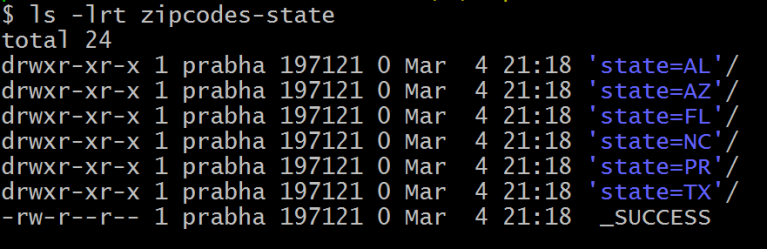

En cada directorio, puede ver uno o más archivos de pieza (dado que nuestro conjunto de datos es pequeño, todos los registros de cada uno statese guardan en un solo archivo de pieza). Puede cambiar este comportamiento repartition() primero por los datos en la memoria. Especifique el número de particiones (archivos de pieza) que desea para cada uno statecomo argumento del método repartition ().

In [ ]:
#partitionBy() multiple columns
df.write.option("header",True) \
        .partitionBy("state","city") \
        .mode("overwrite") \
        .csv("/tmp/zipcodes-state")

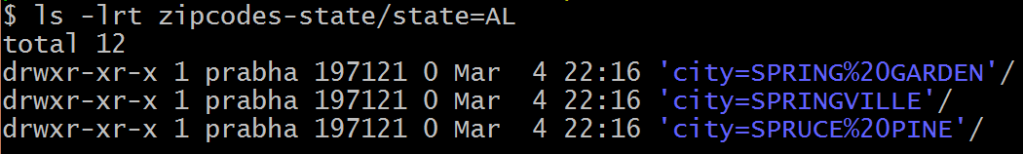


##### Usando repartition () y partitionBy () juntos
Para cada columna de partición, si desea dividir aún más en varias particiones, use repartition()y partitionBy()juntas como se explica en el siguiente ejemplo.

repartition () crea un número específico de particiones en la memoria. El  partitionBy() escribirá archivos en el disco para cada partición de memoria y columna de partición. 



In [ ]:

#Use repartition() and partitionBy() together
dfRepart.repartition(2)
        .write.option("header",True) \
        .partitionBy("state") \
        .mode("overwrite") \
        .csv("c:/tmp/zipcodes-state-more")

#### Leer una partición específica

Las lecturas son mucho más rápidas en datos particionados. Este fragmento de código recupera los datos de una partición específica "state=AL and city=SPRINGVILLE". Aquí, solo lee los datos de esa carpeta específica en lugar de escanear un archivo completo (cuando no está particionado).

In [ ]:
dfSinglePart=spark.read.option("header",True).csv("c:/tmp/zipcodes-state/state=AL/city=SPRINGVILLE")
dfSinglePart.printSchema()
dfSinglePart.show()

Mientras lee datos de partición específicos en DataFrame, no mantiene las columnas de particiones en DataFrame, por lo tanto, usted printSchema()y DataFrame faltan statey citycolumnas.


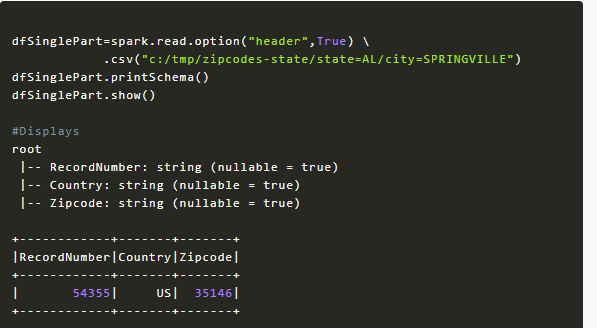